<a href="https://colab.research.google.com/github/jqirko6/AI-ML-2022/blob/main/Copy_of_TRAIN_YLC_Lab_12_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab #12: Semester 1 Review**
---

## **Description**
In the lab you will review regression and classification models. To begin, you will use both a regression and a classification model to analyze the same dataset and determine which is a better fit for the data.<br>
Next, you will use another data set to run a classification model using features of your choice.
Finally, you will use a decision tree to determine the "best features" to use and apply those to your classification model to fin-tune your model.


<br>

### **Today's Review**:

**Part 0:** Import functions <br>
**Part 1:** Supervised Learning Review <br>
**Part 2:** Classification Models Review <br>
**Part 3:** Fine-Tuning a Mdodel Review <br>

<br>

### **Goals**:

By the end of this lab, we hope that you will begin to understand how and why machine learning is used to evaluate data. We hope you understand the different models of supervised learning and what metrics are used to evaluate them. We also hope you see how difficult it can be to determine which model to use, and how not all models are applicable for all datasets.

<br>


## **Cheat Sheets**
[Week 1 Python Basics](https://docs.google.com/document/d/1wPE-OttcW-LB92xeeFyqZUr0s2LA9Wz__WeoWsxk0Nc/edit?usp=share_link)

[Week 2 EDA with pandas](https://docs.google.com/document/d/1QUChtVu2FUa7zhS0kmloUVbvxkCPe8-5kHvjKDv4Z90/edit?usp=share_link)

[Week 3 Data Visualization with matplotlib](https://docs.google.com/document/d/1ZGxNRhqOYOr18uZ7CafmiHVJjs3-JkfYD-WzZVgsUF8/edit?usp=share_link)

[Weeks 5 - 6 K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1zXnjxN75ppoi48qrxMw2W_rBZV2W-XKa4aaRzcOdnCs/edit?usp=share_link)

[Weeks 7 - 8 Linear Regression with sklearn](https://docs.google.com/document/d/1TpbSn1kReOCahuWPSUbxPCNJpr_6jlgXvzXiY1v7y-M/edit?usp=share_link)

[Weeks 10 - 11 Decision Trees with sklearn](https://docs.google.com/document/d/1eCoCpYBmwTGX2AHU0Pu1ZpIeFPU1hog8ouO_9aZpSyI/edit?usp=sharing)


[Week 11 Images with matplotlib and numpy](https://docs.google.com/document/d/1BD7O_e95MfBTtpZOZvr1HTgf8WMGNXrqFr5sx-Lq7rw/edit?usp=sharing)


---
## **Part 0: Import functions**
---

**Run the code below before continuing.**

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import *

import graphviz
import warnings

---
## **Part 1: Supervised Learning Review (during lab)**
---

In this section you will review data and predict which type of supervised learning model will best illustrate the relationship between the different features in the table. Then you will create and run both a KNN and regression model to test your hypotheses.
<br>




---

<center>

### **Feature Selection**

</center>

---

### **Exercise #1**

You will load the dataset from a google sheet that was published as a csv file. Then you will print is out to get a first look at the data.

**Exercise 1:** Run this code to load the data.<br>

In [3]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTskkLnsDmWoUDPfQHxWZLgvaIsvp07fa-_OKTfx4nZbk3GpRgAxLR9dvyL4uBDoUL2eSfBPojlHduf/pub?output=csv"
df=pd.read_csv(url)

print(df.head())

       date  count  holiday  workday  temp  feels_like  humidity  wind  \
0  4/1/2018    436        0        0    13          11        45     4   
1  4/2/2018    391        0        1     9           8        65     2   
2  4/3/2018    384        0        1     8           6        73     3   
3  4/4/2018    413        0        1    13          13        65     4   
4  4/5/2018    489        0        1     7           4        35     5   

   weather  
0        1  
1        1  
2        2  
3        1  
4        1  


### **Exercise #2**

Next you will determine the coorelations between the variables in the dataset and the variance of each feature.  This will help you choose features to use for your model.

ENTER THE CODE TO PRINT THE CORRELATIONS AND VARIANCE.



In [4]:
df.corr()

ValueError: could not convert string to float: '4/1/2018'

In [5]:
df.var()

TypeError: could not convert string to float: '4/1/2018'

### **Exercise #3**
To help narrow down the features to use, you will train a decision tree on this data and see how it rates the importance of features.

MAKE THE FOLLOWING CHANGES TO THE CODE BELOW:

Rename parameter1 and parameter2 to drop the **count** and **date** fields<br>
Change the test_size to **0.3**

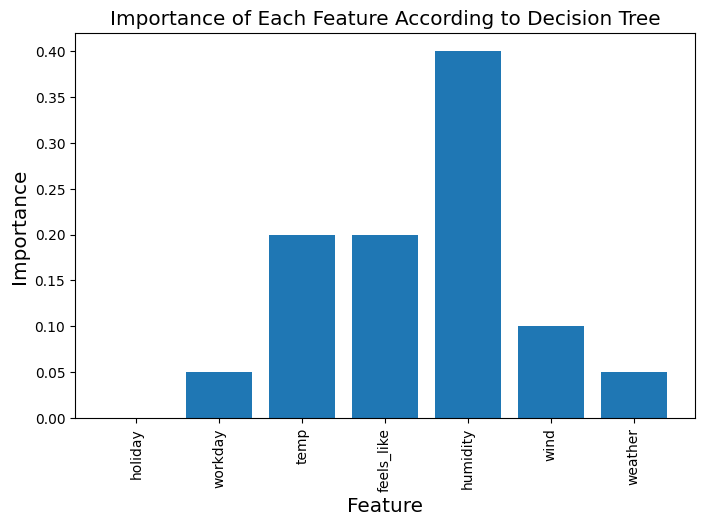

In [6]:
inputs = df.drop(["count","date"], axis=1)
output = df["count"]
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.3, random_state = 42)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

plt.figure(figsize = (8, 5))
plt.bar(X_test.columns, tree.feature_importances_)

plt.title("Importance of Each Feature According to Decision Tree", fontsize = "x-large")
plt.xlabel("Feature", fontsize = "x-large")
plt.ylabel("Importance", fontsize = "x-large")

plt.xticks(rotation = 90)

plt.show()

---

<center>

### **Linear Regression**

</center>

---

###**Exercise #4**

Now you will train and analyze a regression model using all the features, then in the next exercise you will repeat the process using only two features.  <br>

MAKE THE FOLLOWING CHANGES TO THE CODE BELOW:

1. Rename the variable model to **lr1_model**
2. Rename parameter1 and parameter2 to drop the **count** and **date** fields

In [ ]:
inputs= df.drop(["count","date"], axis=1)
output = df["count"]

X_train=X_test=inputs
y_train=y_test=output

lr1_model = LinearRegression()
lr1_model.fit(X_train,y_train)
predictions1=lr1_model.predict(X_test)


Now you will plot the residuals to check for homoscedasticity.

MAKE THE FOLLOWING CHANGES TO THE CODE BELOW:

Change the title of the chart to **Residuals Plot using All Features**

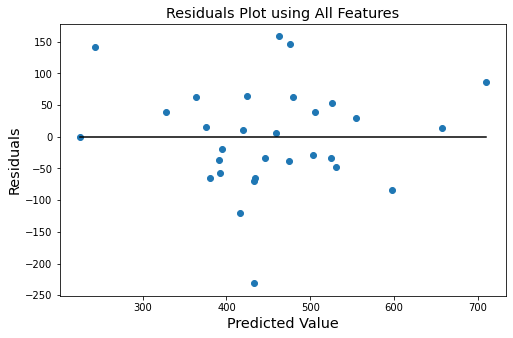

In [ ]:
residuals1 = y_test - predictions1

plt.figure(figsize = (8, 5))
plt.scatter(predictions1, residuals1)

plt.plot([predictions1.min(), predictions1.max()], [0, 0], color = "black")


plt.title("Residuals Plot using All Features", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

Now you will run evaluation metrics on the model to eventually compare it to the second model.


In [ ]:
print("R2 for model with all features: " + str(r2_score(y_test, predictions1)))

print("MSE for model with all features: " + str(mean_squared_error(y_test, predictions1)))
print("MAE for model with all features: " + str(mean_absolute_error(y_test, predictions1)))



R2 for model with all features: 0.6147878873105197
MSE for model with all features: 6454.164318080001
MAE for model with all features: 61.98619093666411


Finally you will run predictions using this model. In the code below, enter the labels and title for the chart.

MAKE THE FOLLOWING CHANGES TO THE CODE BELOW:

Change the variable model to **lr1_model**

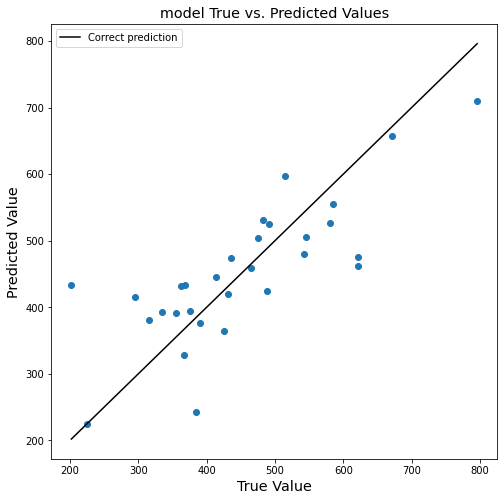

In [ ]:
predictions1 = lr1_model.predict(X_test)

plt.figure(figsize=(8, 8))

plt.scatter(y_test, predictions1)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label="Correct prediction")

plt.xlabel('True Value', fontsize = 'x-large')
plt.ylabel('Predicted Value', fontsize = 'x-large')
plt.title("model True vs. Predicted Values", fontsize = 'x-large')
plt.legend()
plt.show()

### **Exercise #5** <br>
MAKE THE FOLLOWING CHANGES TO THE CODE BELOW:

1. Rename the variable model to **lr2_model**
2. Change the input parameters to **feels_like** and **humidity**


In [ ]:
inputs = df[["parameter1","parameter2"]]
output = df["count"]

X_train=X_test=inputs
y_train=y_test=output

model = LinearRegression()
model.fit(X_train,y_train)
predictions2=model.predict(X_test)

Next you will plot the residuals.

MAKE THE FOLLOWING CHANGES IN THE CODE BELOW:

1. Change the title of the chart to **Residuals Plot using Feels_like and Humidity**
2. Change the variable residuals to **residuals2**
3. Change the variable predictions to **predictions2**

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Chart title", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

Now you will run evaluation metrics to compare it to the first model.


In [ ]:
print("R2 for model with feels-Like and humidity: " + str(r2_score(y_test, predictions2)))

print("MSE for moel with feels_like and humidity: " + str(mean_squared_error(y_test, predictions2)))
print("MAE for model with feels_like and humidity: " + str(mean_absolute_error(y_test, predictions2)))



Finally, you will run predictions on the second model.

MAKE THE FOLLOWING CHANGES TO THE CODE:

1. Change the title to use the model name **lr2_model**
2. Change the variable predictions to **predictions2**
3. Change the variable model to **lr2_model**

In [ ]:
predictions = model.predict(X_test)

plt.figure(figsize=(8, 8))

plt.scatter(y_test, predictions)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label="Correct prediction")

plt.xlabel('True Value', fontsize = 'x-large')
plt.ylabel('Predicted Value', fontsize = 'x-large')
plt.title("True vs. Predicted Values", fontsize = 'x-large')
plt.legend()
plt.show()


###**Exercise #6** <br>

Now you can make inferences using the model you think performed the best.

MAKE THE FOLLOWING CHANGES TO THE CODE:

1. Change the model name to either **lr1_model** or **lr2_model** for your choice of model to run.
2. Change the variable predictions to either **predictions1** if you are using the lr1_model or **predictions2** if you are using the lr2_model.
3. Enter the feature for your first inference as a parameter of X_test.

In [ ]:
coefficients = pd.DataFrame([model.coef_],columns=X_test.columns)
intercept = model.intercept_

print(coefficients)
print(intercept)

feature = X_test["parameter"]

plt.figure(figsize = (10, 8))
plt.scatter(feature, predictions, alpha = 0.25)

plt.title("count vs. feels_like", fontsize = 'x-large')
plt.xlabel("feels_like", fontsize = 'x-large')
plt.ylabel("Count", fontsize = 'x-large')
plt.show()


Now you will run your second inference.

MAKE THE FOLLOWING CHANGES TO THE CODE BELOW:

1. Change the model name to either **lr1_model** or **lr2_model** for your choice of model to run (this should be the same as you used above).
2. Change the variable predictions to either **predictions1** if you are using the lr1_model or **predictions2** if you are using the lr2_model.
3. Enter the feature for your second inference as a parameter of X_test.

In [ ]:
coefficients = pd.DataFrame([model.coef_],columns=X_test.columns)
intercept = model.intercept_

print(coefficients)
print(intercept)

feature = X_test["parameter"]

plt.figure(figsize = (10, 8))
plt.scatter(feature, predictions, alpha = 0.25)

plt.title("Count vs. Humidity", fontsize = 'x-large')
plt.xlabel("Humidity", fontsize = 'x-large')
plt.ylabel("Count", fontsize = 'x-large')
plt.show()

---

<center>

### **KNN**

</center>

---

### **Exercise #7**

Now you will train and test a KNN model to see if a classification model will effectively predict a relationship between the features you chose.

MAKE THE FOLLOWING CHANGES TO THE CODE:

1. Enter the two features you will use as input.
2. Enter **count** as output.

In [ ]:
inputs = df[["feature","feature"]]
output = df["feature"]

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.3, random_state = 42)

mu = X_train.mean()
sig = X_train.std()

X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

###**Exercise #8**

Import the algorithms and fit the model by entering the inputs (features) and outputs (**count**)

MAKE THE FOLLOWING CHANGES TO THE CODE:

Change the value of k to **3**

In [ ]:

cl_model = KNeighborsClassifier(n_neighbors = 1)

cl_model.fit(X_train, y_train)

plot_confusion_matrix(cl_model, X_test, y_test)

predictions = cl_model.predict(X_test)


###**Exercise #9**

Test the model.

MAKE THE FOLLOWING CHANGES TO THE CODE:

Enter **humidity** as the parameter for X-test

In [ ]:
pred = cl_model.predict(X_test)

humidity = X_test["parameter"]
count = predictions

plt.figure(figsize=(10,6))
plt.scatter(humidity, predictions)

plt.title("Effect of Humidity on Count")
plt.xlabel("Humidity")
plt.ylabel("Count")

plt.show()

Test the model.

MAKE THE FOLLOWING CHANGES TO THE CODE:

Enter **feels_like** as the parameter for X-test

In [ ]:
pred = cl_model.predict(X_test)

feels_like = X_test["parameter"]
count = predictions

plt.figure(figsize=(10,6))
plt.scatter(feels_like, predictions)

plt.title("Effect of Feels_like on Count")
plt.xlabel("Feels_like")
plt.ylabel("Count")

plt.show()

###**Exercise #10**
Run a classification report with metrics to evaluate your model

In [ ]:
print(classification_report(y_test,pred))


###**Exercise #11**

Run the model with the value of K adjusted to $\sqrt{\text{size of dataset}}$ and evaluate again.

Does it make any difference?


In [ ]:
k = int(len(X_train)**(1/2))
cl_model = KNeighborsClassifier(n_neighbors = k)
cl_model.fit(X_train, y_train)

pred = cl_model.predict(X_test)

plot_confusion_matrix(cl_model, X_test, y_test)

print(classification_report(y_test,pred))

###**Exercise #12**

Make Predictions with your model

MAKE THE FOLLOWING CHANGES TO THE CODE:

1. Enter a value for **humidity** and **feels_like** and see how well it predicts the count of bikes rented.
2. Then enter differents number and see if the count is higher or lower as expected.
3. Finally, enter **50** for both the humidity and feels_like to see how it performs.

In [ ]:
count = pd.DataFrame([[50,50]], columns = ["feels_like","humidity"])

predictions = cl_model.predict(count)

print("the count is predicted to be: ", predictions)

NameError: ignored

---

<center>

### **Random Forest and Gradient Boosting**

</center>

---

### **Exercise #13**

You should have found above the this is clearly a problem more well suited to regression than classification. So, let's see how the more advanced model's we've learned about for regression perform with this dataset.


Rerun `train_test_split` code below to make sure we're including all features.

In [ ]:
inputs= df.drop(["count","date"], axis=1)
output = df["count"]

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.2, random_state = 42)

Train and evaluate a **Random Forest Regressor**

MAKE THE FOLLOWING CHANGES TO THE CODE:

1. Specify the number of trees (`n_estimators`) to be **300**
2. Specify the number of features to consider at random for each split (`max_features`) to be **2**. These are in line with the general rules of thumb discussed in lecture last week.

In [ ]:
rf = RandomForestRegressor(n_estimators = 0, max_features =0 )
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

print("R2: " + str(r2_score(y_test, rf_predictions)))
print("MSE: " + str(mean_squared_error(y_test, rf_predictions)))
print("MAE: " + str(mean_absolute_error(y_test, rf_predictions)))

Tain and evaluate a **Gradient Boosted Tree Regressor**

MAKE THE FOLLOWING CHANGES TO THE CODE:

1. Specify the number of trees (`n_estimators`) to be **100**
2. Specify how much we attempt to learn from each set of errors (`learning_rate`) to be **0.01**.

In [ ]:
gb = GradientBoostingRegressor(n_estimators =0, learning_rate =)
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)

print("R2: " + str(r2_score(y_test, gb_predictions)))
print("MSE: " + str(mean_squared_error(y_test, gb_predictions)))
print("MAE: " + str(mean_absolute_error(y_test, gb_predictions)))

---

<center>

### **Return to lab presentation**

</center>

---

---
##**Part 2: Classification Model Review (optional during lab/at home)**
---

In this section you will load a new dataset that lists features of specific animals along with the class type the animal belongs to. For each feature, a 1 represents true while a 0 represents false. The class types are as follows:

1=Mammal, 2=Bird, 3=Reptile, 4=Fish, 5=Amphibian, 6=Bug, 7=Invertebrate

You will run different classification models to correctly predict the class type by the features provided.

###**Exercise #1**

First you will import and print a new dataset.


In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRoFIQ4M8JcCuijWnuTZuqCrzBvGAgkVigXAcjYylLaLLycSYxDdsTMyr5272JV9u-mEMfAW87X_ccT/pub?output=csv"
df=pd.read_csv(url)

df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


###**Exercise #2**

You will start by chooing all the variables and splitting the data.


MAKE THE FOLLOWING CHANGES TO THE CODE:

1. Drop **class_type** from inputs.
2. Change the test_size to **30%**

In [ ]:
inputs = df.drop(columns = ["feature"], axis = 1)
output = df["class_type"]

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.1, random_state = 42)


---

<center>

### **Decision Tree**

</center>

---

###**Exercise #3**
Run the code below to initialize and fit the decision tree model

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

###**Exercise #4**
Run the code below to create a classification report to test predictions.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      0.80      0.89         5
           7       0.75      1.00      0.86         3

    accuracy                           0.94        31
   macro avg       0.77      0.83      0.79        31
weighted avg       0.92      0.94      0.92        31



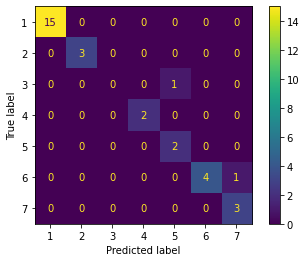

In [ ]:
predictions = tree.predict(X_test)

plot_confusion_matrix(tree, X_test, y_test)

print("Report: " + str(classification_report(y_test, predictions)))


###**Exercise #5**
Run the code below then evaluate the depth of model and visualize the tree.

How deep is the tree?
How many leaves are there?



Depth: 6
Number of Leaves: 8


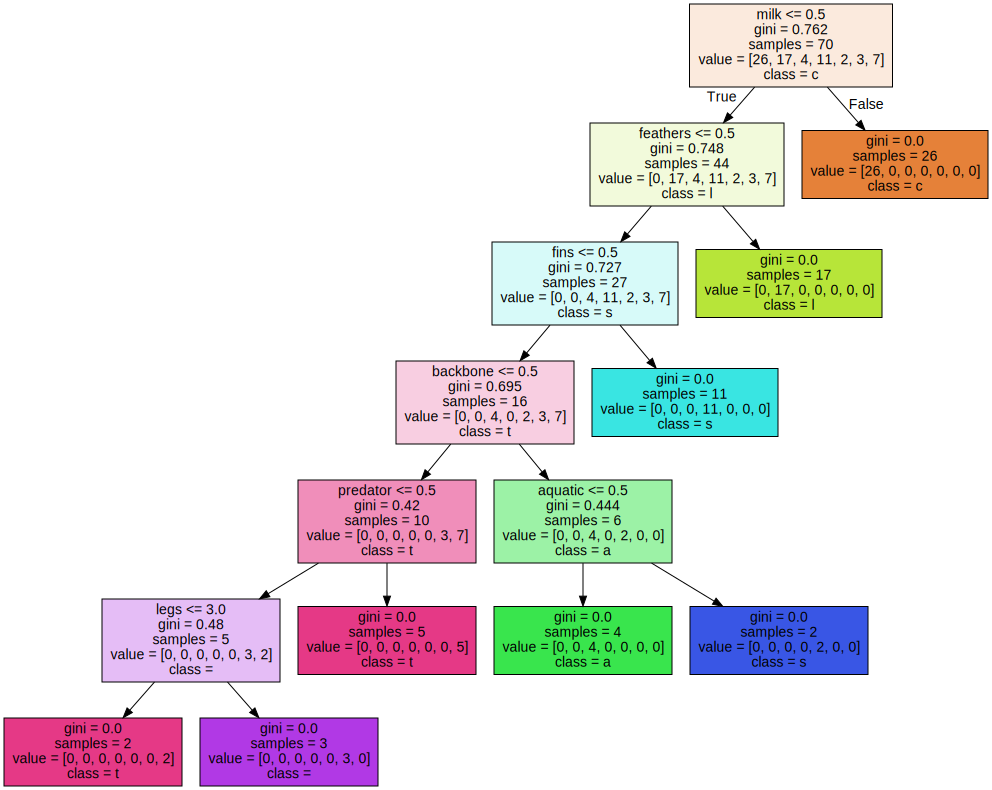

In [ ]:
print("Depth: " + str(tree.get_depth()))
print("Number of Leaves: " + str(tree.get_n_leaves()))

dot_data = export_graphviz(tree, feature_names = X_test.columns, class_names= "class type", filled = True)
graphviz.Source(dot_data, format="png")



###**Exercise #6**
Runt he following code to visualize the feature importance. Which features are considered most important based on this analysis?

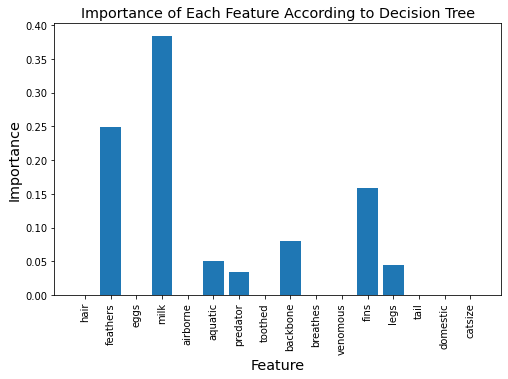

In [ ]:
plt.figure(figsize = (8, 5))
plt.bar(X_test.columns, tree.feature_importances_)

plt.title("Importance of Each Feature According to Decision Tree", fontsize = "x-large")
plt.xlabel("Feature", fontsize = "x-large")
plt.ylabel("Importance", fontsize = "x-large")

plt.xticks(rotation = 90)

plt.show()

###**Exercise #7**
Run the code below to initialize and train three separate models with depths: 1, 2, and 3.

In [ ]:
d1_tree = DecisionTreeClassifier(max_depth = 1)
d2_tree = DecisionTreeClassifier(max_depth = 2)
d3_tree = DecisionTreeClassifier(max_depth = 3)

d1_tree.fit(X_train, y_train)
d2_tree.fit(X_train, y_train)
d3_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

**Evaluate decision tree with depth 1**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.19      1.00      0.32         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3

    accuracy                           0.58        31
   macro avg       0.17      0.29      0.19        31
weighted avg       0.50      0.58      0.51        31



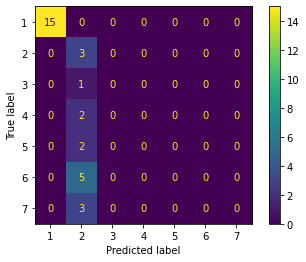

In [ ]:
predictions = d1_tree.predict(X_test)

plot_confusion_matrix(d1_tree, X_test, y_test)

print(classification_report(y_test, predictions))


**Evaluate decision tree with depth 2**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.15      1.00      0.27         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3

    accuracy                           0.65        31
   macro avg       0.31      0.43      0.32        31
weighted avg       0.59      0.65      0.60        31



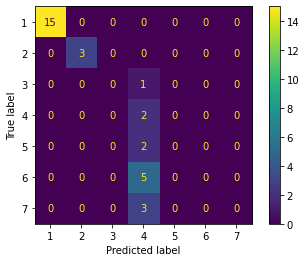

In [ ]:
predictions = d2_tree.predict(X_test)

plot_confusion_matrix(d2_tree, X_test, y_test)

print(classification_report(y_test, predictions))


**Evaluate decision tree with depth 3**




/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       0.27      1.00      0.43         3

    accuracy                           0.74        31
   macro avg       0.47      0.57      0.49        31
weighted avg       0.67      0.74      0.69        31



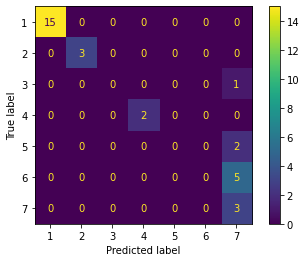

In [ ]:
predictions = d3_tree.predict(X_test)

plot_confusion_matrix(d3_tree, X_test, y_test)

print(classification_report(y_test, predictions))



**Run to visualize the worst performing pruned tree**

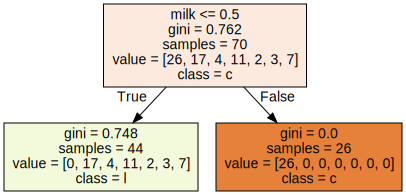

In [ ]:

dot_data = export_graphviz(d1_tree, feature_names = X_test.columns, class_names= "class_type", filled = True)
graph = graphviz.Source(dot_data, format="png")
graph

---

<center>

### **KNN**

</center>

---

### **Exercise #8**

Using the same dataset as above, use the features determined by the decision tree (**milk** and **feathers**) to train a KNN model.

MAKE THE FOLLOWING CHANGES TO THE CODE:

1. Change variable1 to **milk**.
2. Change variable2 to **feathers**.
3. Change the x and y axis labels to the correct feature names.

In [ ]:
variable1 = df["variable1"]
variable2 = df["variable2"]
class_type = df["class_type"]

plt.figure(figsize=(10,6))
plt.scatter(variable1, variable2, c = class_type)

plt.title("Milk vs. Feathers determining Class Type")
plt.xlabel("v1")
plt.ylabel("v2")

plt.show()

NameError: ignored

###**Exercise #9**

Run the code to pplit and scale the data.

In [ ]:
inputs = df[["hair", "feathers", "eggs", "milk", "airborne","aquatic", "predator",
             "toothed","backbone", "breathes", "venomous", "fins", "legs",
             "tail", "domestic", "catsize"]]
output = df["class_type"]

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.3, random_state = 42)

mu = X_train.mean()
sig = X_train.std()

X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig



**Now, initialize and fit the model.**

In [ ]:
k = int(len(X_train)**(1/2))
model = KNeighborsClassifier(n_neighbors = k)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

###**Exercise #10**

Now you can make predictions using your model.

MAKE THE FOLLOWING CHANGES TO THE CODE:

1. Enter the following parameters for a mammal: **1,0,0,0,0,0,1,1,1,1,0,0,1,1,0,1**
2. Check the prediction.
3. Enter the following parameters for a bird: **0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0**
4. Check the prediction.


In [ ]:
class_type = pd.DataFrame([[  ]], columns = ["hair", "feathers", "eggs", "milk", "airborne","aquatic", "predator",
             "toothed","backbone", "breathes", "venomous", "fins", "legs",
             "tail", "domestic", "catsize"])

prediction = model.predict(class_type)

print("class_type predicted is: ",prediction)
print("where 1= Mammal, 2=Bird, 3=Reptile, 4=Fish, 5=Amphibian, 6=Bug, 7=Invertebrate")

class_type predicted is:  [2]
where 1= Mammal, 2=Bird, 3=Reptile, 4=Fish, 5=Amphibian, 6=Bug, 7=Invertebrate


###**Exercise #11**
Run the code to evaluate your model

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       0.27      1.00      0.43         3

    accuracy                           0.74        31
   macro avg       0.47      0.57      0.49        31
weighted avg       0.67      0.74      0.69        31



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

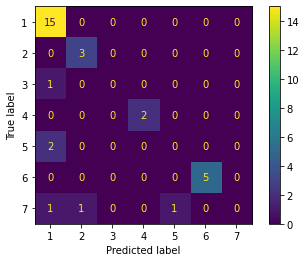

In [ ]:
metrics.classification_report(y_test, predictions)
print(classification_report(y_test, predictions))
metrics.plot_confusion_matrix(model, X_test, y_test)

---

<center>

### **Random Forest and Gradient Boosting**

</center>

---

### **Exercise #12**

Let's see how the more advanced model's we've learned about for classification perform with this dataset.

Run the code for `train_test_split` to make sure we're including all features.

In [ ]:
inputs = df.drop(columns = ["class_type"], axis = 1)
output = df["class_type"]

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.3, random_state = 42)

Train and evaluate a **Random Forest Classifier**

MAKE THE FOLLOWING CHANGES TO THE CODE:

1. Specify the number of trees (`n_estimators`) to be **1000**
2. Specify the number of features to consider at random for each split (`max_features`) to be **4**.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.80      0.81      0.80        31
weighted avg       0.92      0.94      0.92        31



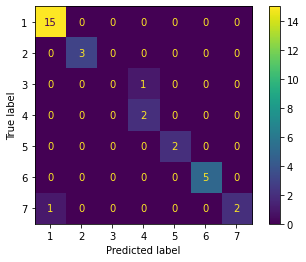

In [ ]:
rf = RandomForestClassifier(n_estimators =0, max_features = 0)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)


plot_confusion_matrix(rf, X_test, y_test)
print(classification_report(y_test, rf_predictions))

Train and evaluate a **Gradient Boosted Tree Classifier**

MAKE THE FOLLOWING CHANGES TO THE CODE:

1. Specify the number of trees (`n_estimators`) to be **1000**
2. Specify how much we attempt to learn from each set of errors (`learning_rate`) to be **0.01**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.97        31
   macro avg       0.98      0.95      0.96        31
weighted avg       0.97      0.97      0.97        31



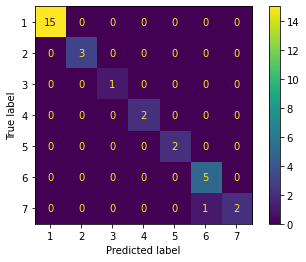

In [ ]:
gb = GradientBoostingClassifier(n_estimators = 0, learning_rate =0 )
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)

plot_confusion_matrix(gb, X_test, y_test)
print(classification_report(y_test, gb_predictions))

---
##**Part 3: Fine-Tuning a Model Review (optional at home)**
---

Part of building a machine learning model is trial and error. Practice changing the following parameters in part 1 and observe how the models change: <br>

*   test_size of dataset
*   input features
*   value of k
*   maximum depth of trees used
*   number of trees used in ensemble methods
*   number of features considered in random forest
*   learning rate

**Consider the following questions after you make the changes:**<br>
Which changes made the biggest difference in the models?<br>
Which changes made the models appear more accurate?<br>
Do you think classification is the best method of supervised learning for this dataset? Why or why not?


---
## **Part 4: Classifying Handwritten Digts (optional at home)**
---

Here, you are given a dataset with 1797 images of handwritten digits. Much like the face completion task from last week that some of you may have done, you will try to use machine learning to model these images and learn meaningful relationships between them. However, this time we will focus on a *single output classification problem*: identifying what number each image represents. As such, we have:

<br>

**The features**: 64 pixels representing a handwritten digit (to be displayed in an 8X8 square)

**The target**: 1 number from 0 to 9 (since the outputs are numeric, we could technically perform regression here, but there are only a small number of discrete values allowed so classification is a more logical choice to start with)


<br>

*NOTE: There is a cheat sheet provided at the top of this notebook that can help you with manipulating and showing images like these.*

---

#### **Exercise #1**

**Run the code below to load the digit dataset in from sklearn and then split this into the images themselves and the numbers (labels/targets) for each one.**

In [ ]:
from sklearn.datasets import load_digits

images, numbers = load_digits(return_X_y = True)

#### **Exercise #2**

**Run the code below to show the digits using what these images look like using matplotlib's `imshow(...)` function.**

Feel free to change the index for each image/number to see what different handwritten digits look like.

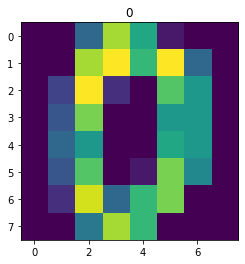

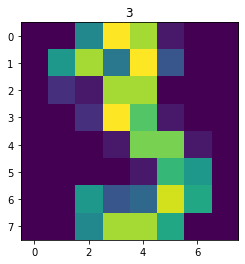

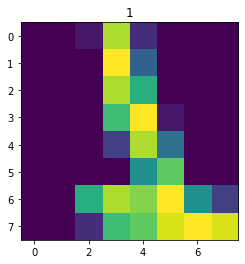

In [ ]:
plt.imshow(images[0].reshape((8, 8)))
plt.title(numbers[0])
plt.show()

plt.imshow(images[3].reshape((8, 8)))
plt.title(numbers[3])
plt.show()

plt.imshow(images[1000].reshape((8, 8)))
plt.title(numbers[1000])
plt.show()

#### **Exercise #3**

Complete the code below to train 4 different models to predict the number that an image corresponds to as follows:

1. Split the data into 70% training and 30% test sets

2. Train a KNN Classifier with `K = 5` and make predictions on the test set

3. Train a Decision Tree Classifier with no pruning and make predictions on the test set

4. Train a Random Forest Classifier with `n_estimators = 100` and `max_features = 8` and make predictions on the test set

5. Train a Gradient Boosted Tree Classifier with `n_estimators = 100` and `learning_rate = 0.1` and make predictions on the test set

---

**1. Split the data into 70% training and 30% test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, numbers, test_size = 0.1, random_state = 42)

**2. Train a KNN Classifier with `K = 5` and make predictions on the test set**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

**3. Train a Decision Tree Classifier with no pruning and make predictions on the test set**

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

**4. Train a Random Forest Classifier with `n_estimators = 100` and `max_features = 8` and make predictions on the test set**

In [ ]:
rf = RandomForestClassifier(n_estimators = 0, max_features = 0)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

**5. Train a Gradient Boosted Tree Classifier with `n_estimators = 100` and `learning_rate = 0.1` and make predictions on the test set**

In [ ]:
gb = GradientBoostingClassifier(n_estimators = 0, learning_rate = 0)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

#### **Exercise #4**

Let's see how each model did! Specifically print the classification report and plot the confusion matrix for each model.

**1. KNN**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



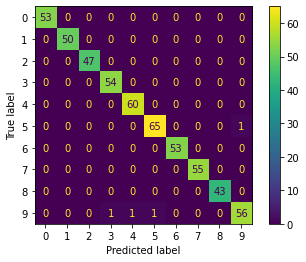

In [ ]:
print(classification_report(y_test, knn_preds))
plot_confusion_matrix(knn, X_test, y_test)

**Decision Tree**

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.84      0.72      0.77        50
           2       0.79      0.79      0.79        47
           3       0.73      0.85      0.79        54
           4       0.81      0.83      0.82        60
           5       0.95      0.85      0.90        66
           6       0.86      0.92      0.89        53
           7       0.87      0.85      0.86        55
           8       0.76      0.88      0.82        43
           9       0.86      0.81      0.83        59

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.85      0.84      0.84       540



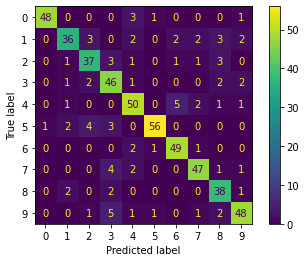

In [ ]:
print(classification_report(y_test, tree_preds))
plot_confusion_matrix(tree, X_test, y_test)

**Random Forest**

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.94      0.96        54
           4       0.97      1.00      0.98        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       0.96      0.98      0.97        55
           8       0.96      1.00      0.98        43
           9       0.96      0.93      0.95        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



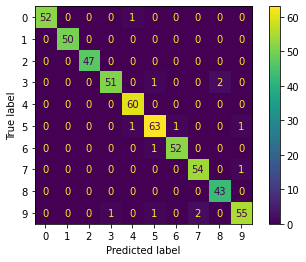

In [ ]:
print(classification_report(y_test, rf_preds))
plot_confusion_matrix(rf, X_test, y_test)

**Gradient Boosting**

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      0.97      0.97        60
           5       0.98      0.94      0.96        66
           6       0.98      0.96      0.97        53
           7       0.95      0.98      0.96        55
           8       0.90      1.00      0.95        43
           9       0.92      0.93      0.92        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



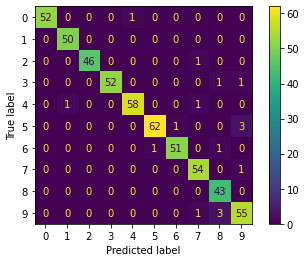

In [ ]:
print(classification_report(y_test, gb_preds))
plot_confusion_matrix(gb, X_test, y_test)

#### **Exercise #5**

Now, let's get a visual sense of how these models did! Specifically, show one of the test images and the predicted number for each model by running the code below.

Change the value of the variable `digit_id` to see the results for a different digit. There are 540 digits in the test set.

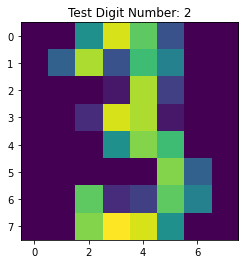

True Value: 3
KNN: 3
Decision Tree: 3
Random Forest: 3
Gradient Boosting: 3


In [ ]:
digit_id = 0

plt.imshow(X_test[digit_id].reshape(8,8))
plt.title("Test Digit Number: " + str(digit_id))
plt.show()

print("True Value: " + str(y_test[digit_id]))
print("KNN: " + str(knn_preds[digit_id]))
print("Decision Tree: " + str(tree_preds[digit_id]))
print("Random Forest: " + str(rf_preds[digit_id]))
print("Gradient Boosting: " + str(gb_preds[digit_id]))

**Exercise #6**

Here are some key questions to reflect upon and perhaps test out yourself:
* Which model performed the best? Why? Is this what you expected?

* Which model performed the worst? Why? Is this what you expected?

* Are there specific numbers that the models generally struggled with more? (Hint. Consult the confusion matrices)

* Did each model struggle with different numbers? (Hint. Consult the confusion matrices)

* Are there specific numbers that got mixed up more often? Why? (Hint. Consult the confusion matrices)

* Can we increase the quality of any of these models by tuning their hyperparameters differently?

* How would these models perform if they were only trained on some digits (ex: 0 - 5), but tested on all of them (0 - 9)?

* How would these models perform if they were only given half or some other portion of each digit's image?

# End of Lab

---

© 2022 The Coding School, All rights reserved